In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
import pickle
import time

import Dense
import mse
import ReLU
import Sigmoid
import Softmax
import LogLoss
import Tanh

In [2]:
with open('data_train.pickle', 'rb') as d:
    LOADED_DATA = pickle.load(d)

In [3]:
#data preparation

class One_Hot_Encoder:
    def __init__(self, dims):
        self.mat = -np.ones((dims, dims))
        for i in range(dims):
            self.mat[i][i]=1
        
    def __call__(self, data):
        return self.mat[int(data)]
    
    
def transform_from_pickle(data):
    encoder = One_Hot_Encoder(10)
    target_after_encoding = [encoder(int(i)) for i in data['target']]
    target = np.array(target_after_encoding)
    return data['data'], target

def train_test_split(data, target, validation_size=0.25, shuffle=True):
    assert len(data) == len(target)
    if shuffle:
        p = np.random.permutation(len(data))
        data = data[p]
        target = target[p]
    partition = int(len(data)*validation_size)
    return (data[:partition], data[partition:],
            target[:partition], target[partition:])

def standartize(data, epsilon=0.0001):
    return (data - np.mean(data, axis=0)) /(np.std(data, axis=0) + epsilon)

8.0

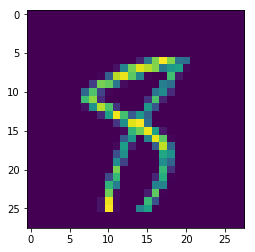

In [4]:
pyplot.imshow(LOADED_DATA['data'][15].reshape(28,28))
LOADED_DATA['target'][15]

In [13]:
class net3:
    def __init__(self):
        self.d1 = Dense.Dense(28*28, 10, 0.0001)
        self.a1 = Tanh.Tanh()
        self.loss_ = mse.mse()
    
    def loss(self, x, y):
        return self.loss_.forward(x, y)
    
    def forward(self, x, label=None, prnt=False):
        x = self.d1.forward(x)
        x = self.a1.forward(x)
        if prnt:
            print(x)
        if label is None:
            return x
        return self.loss_.forward(x, label)
    
    def backward(self):
        loss = self.loss_.backward()
        loss = self.a1.backward(loss)
        loss = self.d1.backward(loss)

In [14]:
n = net3()
train_losses = []
valid_losses = []

In [67]:
TRANSFORMED_DATA, TARGET = transform_from_pickle(LOADED_DATA)
DATA = standartize(TRANSFORMED_DATA)

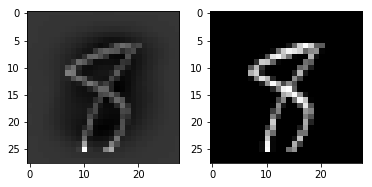

In [15]:
pyplot.subplot(1, 2, 1)
pyplot.imshow(DATA[15].reshape(28,28), cmap='gray')
pyplot.subplot(1, 2, 2)
pyplot.imshow(LOADED_DATA['data'][15].reshape(28,28), cmap='gray')

In [36]:
t1 = time.time()
epochs = 20
for epoch in range(epochs):
    t_start_epoch = time.time()
    train_data, valid_data, train_target, valid_target = train_test_split(DATA, TARGET)
    loss = 0
    for index, (data, target) in enumerate(zip(train_data, train_target)):
        t_start_thousand = time.time()
        loss += n.forward(data, target)
        n.backward()
    train_losses.append(loss)
    loss = 0
    for data, target in zip(valid_data, valid_target):
        loss += n.forward(data, target)
    valid_losses.append(loss)
    t_end_epoch = time.time()
    print('epoch #', epoch, 'time', t_end_epoch - t_start_epoch, 'loss =', loss)
t2 = time.time()
print(t2 - t1)

epoch # 0 time 3.633794069290161 loss = 2311.589142158409
epoch # 1 time 3.736325740814209 loss = 2306.4506335197048
epoch # 2 time 3.7572920322418213 loss = 2316.5215669219956
epoch # 3 time 3.6387250423431396 loss = 2319.597953240435
epoch # 4 time 3.6106932163238525 loss = 2305.3959704637246
epoch # 5 time 3.845900535583496 loss = 2309.102709269165
epoch # 6 time 3.8697080612182617 loss = 2295.92255467543
epoch # 7 time 3.931142568588257 loss = 2284.674941685556
epoch # 8 time 3.6794943809509277 loss = 2287.2476750288856
epoch # 9 time 4.187506437301636 loss = 2294.586999331977
epoch # 10 time 4.378525972366333 loss = 2317.7834331597896
epoch # 11 time 5.110016107559204 loss = 2307.93069315802
epoch # 12 time 5.909234285354614 loss = 2292.8562468141836
epoch # 13 time 3.6628079414367676 loss = 2307.6281858194357
epoch # 14 time 4.025630474090576 loss = 2313.494778527784
epoch # 15 time 3.5852084159851074 loss = 2316.727253658763
epoch # 16 time 3.6492080688476562 loss = 2298.9793342

36406 0.9245968253968254


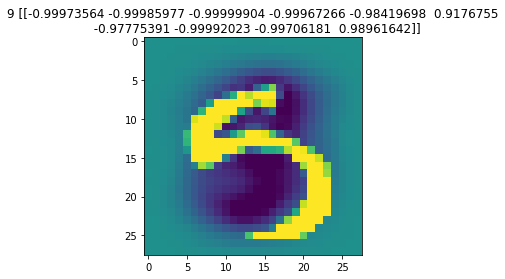

In [37]:
right_answers = 0
for data, target in zip(valid_data, valid_target):
        answer = n.forward(data)
        if np.argmax(answer) == np.argmax(target):
            right_answers += 1
        else:
            wrong_data = data
print(right_answers, right_answers/valid_target.shape[0])
pyplot.imshow(wrong_data.reshape(28, 28), vmin=-1, vmax=1)
pyplot.title(str(np.argmax(n.forward(wrong_data))) + ' ' + str(n.forward(wrong_data)))
n.d1.lr /= 10

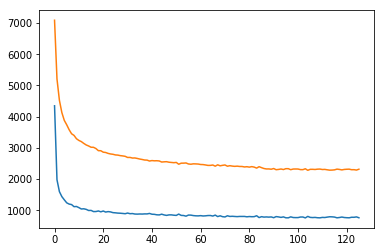

In [38]:
start = 0
pyplot.plot(train_losses[start:])
pyplot.plot(valid_losses[start:])

[[-0.99739751 -0.99891509 -0.96922506 -0.98454321 -0.99981767 -0.99554208
  -0.99972554  0.98688734 -0.99835661 -0.9949977 ]]
(1, 10)


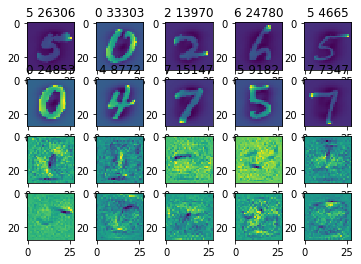

In [83]:
for i in range(10):
    number = np.random.randint(len(DATA))
    pyplot.subplot(4, 5, i+1)
    pyplot.imshow(DATA[number].reshape(28, 28))
    pyplot.title(str(np.argmax(n.forward(DATA[number]))) + ' ' + str(number))
print(n.forward(DATA[number]))
print(n.forward(DATA[number]).shape)
for i in range(10):
    pyplot.subplot(4, 5, i+11)
    pyplot.imshow(np.transpose(n.d1.mt, (1, 0))[i].reshape(28, 28))

[[-0.99739751 -0.99891509 -0.96922506 -0.98454321 -0.99981767 -0.99554208
  -0.99972554  0.98688734 -0.99835661 -0.9949977 ]]
7


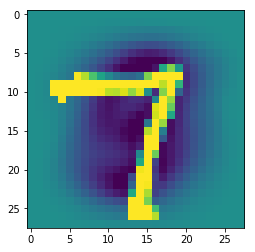

In [84]:
pyplot.imshow(DATA[number].reshape(28, 28), vmin=-1, vmax=1)
answer = n.forward(DATA[number])
print(answer)
print(np.argmax(answer))
